In [1]:
from google.colab import files

uploaded = files.upload()

Saving hotel_booking_small.csv to hotel_booking_small.csv


## A program by IISc and TalentSprint - Shared by Gaurav


## Learning Objectives

At the end of the experiment, you will be able to

* understand various optimization algorithms
* minimize the value of cost function by finding the minima
* implement gradient descent algorithm and its variations: stochastic, batch and mini-batch gradient descent

## Information

#### Optimization:

Optimization consists of procedures that make a system as effective as possible. It is an important tool in decision science and in the analysis of physical systems. To make use of this tool, we must first identify some objective, a quantitative measure of the performance of the system under study. This objective could be profit, time, potential energy, or any quantity or combination of quantities that can be represented by a single number. The objective depends on certain characteristics of the system, called variables or unknowns. Our goal is to find values of the variables that optimize the objective.

* Helps improve the quality of decision-making
* Applications in Engineering, Business, Economics, Science, Military Planning etc.

**Gradient Descent**: It is the most common optimization algorithm in machine learning and deep learning. It is a first-order optimization algorithm. This means it only takes into account the first derivative when performing the updates on the parameters. On each iteration, we update the parameters in the opposite direction of the gradient of the objective function J(w) w.r.t the parameters where the gradient gives the direction of the steepest ascent. The size of the step we take on each iteration to reach the local minimum is determined by the learning rate $α$. Therefore, we follow the direction of the slope downhill until we reach a local minimum (refer to the image below).
![img](https://miro.medium.com/max/700/1*rcmvCjQvsxrJi8Y4HpGcCw.png)

### Setup Steps:

#### Importing required packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize as opt
import pandas as pd

### Optimization

 First, let's define a simple mathematical function (the opposite of the cardinal sine). This function has many local minima but a single global minimum.

 Refer the [link](https://www.mathworks.com/help/signal/gs/the-sinc-function.html) for more information on the below function.

In [3]:
# function f
def f(x):
    return 1 - np.sin(x) / x








Let's plot this function in the interval [−20,20] (with 1000 samples)

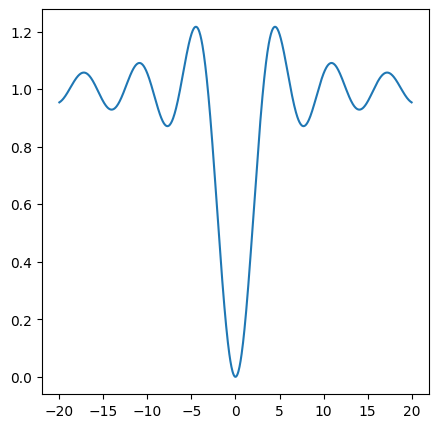

In [4]:
# create an array and apply the function
x = np.linspace(-20., 20., 1000)
y = f(x)
# visualize the plot
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x, y)

The `scipy.optimize` module comes with many function minimization routines. The `minimize()` function offers a unified interface to many algorithms. The Broyden-Fletcher-Goldfarb-Shanno (BFGS) algorithm (the default algorithm in `minimize()`) gives good results in general. The `minimize()` function requires an initial point as argument. For scalar univariate functions, we can also use `minimize_scalar()`

In [5]:
# optimize
x0 = 3
xmin = opt.minimize(f, x0).x

Starting from x0=3, the algorithm was able to find the actual global minimum, as shown in the following figure

(-20.0, 20.0)

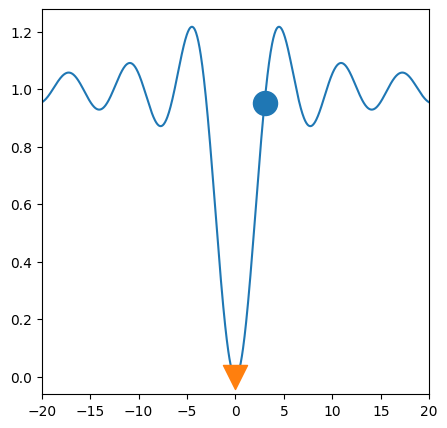

In [6]:
# visualize
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x, y)
ax.scatter(x0, f(x0), marker='o', s=300)
ax.scatter(xmin, f(xmin), marker='v', s=300, zorder=20)
ax.set_xlim(-20, 20)

Now, if we start from an initial point that is farther away from the actual global minimum, the algorithm converges towards a local minimum only

In [7]:
# opitmize from initial point
x0 = 10
xmin = opt.minimize(f, x0).x

(-20.0, 20.0)

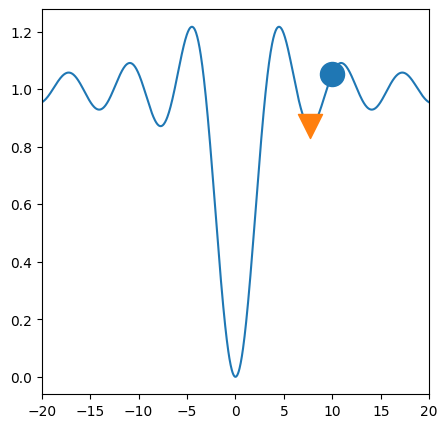

In [8]:
# visualize
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x, y)
ax.scatter(x0, f(x0), marker='o', s=300)
ax.scatter(xmin, f(xmin), marker='v', s=300, zorder=20)
ax.set_xlim(-20, 20)

## Gradient descent
Gradient descent is an optimization algorithm to find the minimum of a function. We start with a random point on the function and move in the negative direction of the gradient of the function to reach the local/global minima.

Gradient descent is the backbone of a machine learning algorithm.

### Example: Find the local minima of the function $y=(x+5$)$^2$ starting from the point $x=3$

<img src="https://cdn.iisc.talentsprint.com/CDS/Images/convex_curve.png" width = "350px;"/>


By observing the above plot, we know that $y = (x+5)^2$ reaches it’s minimum value when x = -5 (i.e when x=-5, y=0).

Hence x=-5 is the local and global minima of the function.

Now we will see how to obtain the same numerically, using gradient descent.

**Step 1 :** Initialize x =3. Find the gradient of the function, dy/dx = 2*(x+5).

**Step 2 :** Move in the direction of the negative of the gradient. The learning rate determines how many steps to move. Let us assume the learning rate is 0.01

**Step 3 :** Perform 2 iterations of gradient descent

The parameter update formula in gradient descent is:

$ x_{new} = x_{old} - (learning\ rate * (dy/dx))$,

- where $dy/dx$ is the derivative of the function with respect to a single weight, done for all the weights

<img src="https://cdn.iisc.talentsprint.com/CDS/Images/GD_iterations.png" width ="480px;"/>

**Step 4 :** We can observe that the X value is slowly decreasing and should converge to -5 (the local minima). However, how many iterations should we perform?

We can set a precision variable in our algorithm which calculates the difference between two consecutive “x” values. If the difference between x values from 2 consecutive iterations is lesser than the precision we set, stop the algorithm!

### We can solve the above optimization problem by implementing the gradient descent algorithm in Python:

In [9]:
# Step 1 : Initialize parameters

cur_x = 3                   # The algorithm starts at x=3
rate = 0.01                 # Learning rate
precision = 0.0001          # This tells us when to stop the algorithm
previous_step_size = 1      # Limit to monitor change in x
max_iters = 1000            # maximum number of iterations
iters = 0                   # iteration counter
df = lambda x: 2*(x+5)      # Gradient of our function

In [10]:
# Step 2 : Run a loop to perform gradient descent:
# i. Stop loop when difference between x values from last 2 consecutive iterations is less than 0.0001 or when number of iterations exceeds 1,000

while previous_step_size > precision and iters < max_iters:
    prev_x = cur_x                                     # Store current x value in prev_x
    cur_x = cur_x - rate * df(prev_x)                  # Grad descent
    previous_step_size = abs(cur_x - prev_x)           # Change in x
    iters = iters+1                                    # iteration count
    print("Iteration", iters, "\nX value is", cur_x)   # Print iterations

print("The local minimum occurs at", cur_x)

Iteration 1 
X value is 2.84
Iteration 2 
X value is 2.6832
Iteration 3 
X value is 2.529536
Iteration 4 
X value is 2.37894528
Iteration 5 
X value is 2.2313663744
Iteration 6 
X value is 2.0867390469119997
Iteration 7 
X value is 1.9450042659737599
Iteration 8 
X value is 1.8061041806542846
Iteration 9 
X value is 1.669982097041199
Iteration 10 
X value is 1.5365824551003748
Iteration 11 
X value is 1.4058508059983674
Iteration 12 
X value is 1.2777337898784
Iteration 13 
X value is 1.152179114080832
Iteration 14 
X value is 1.0291355317992152
Iteration 15 
X value is 0.9085528211632309
Iteration 16 
X value is 0.7903817647399662
Iteration 17 
X value is 0.6745741294451669
Iteration 18 
X value is 0.5610826468562635
Iteration 19 
X value is 0.44986099391913825
Iteration 20 
X value is 0.3408637740407555
Iteration 21 
X value is 0.23404649855994042
Iteration 22 
X value is 0.1293655685887416
Iteration 23 
X value is 0.026778257216966764
Iteration 24 
X value is -0.07375730792737258
It

From the above output we can observe the $x$ values after each iteration and the optimized solution. The $x$ values from the first 2 iterations can be cross checked with our earlier manual calculation.

###Solving a linear regression problem with Gradient descent

Here, we consider a simple pendulum oscillation dataset with two variables. The dataset consists of two columns and 89 rows. Each column represents a characteristic of a simple pendulum i.e l (length) and t (time period). The dataset describes the relationship between the l and t which is $L∝T^2$ .

In [11]:
# Load the data by using pandas read_csv()
df = pd.read_csv('hotel_booking_small.csv')

# drop columns which have nan values
df = df.dropna(axis=1)

# Target = stays_in_weekend_nights + stays_in_week_nights
y = df["stays_in_week_nights"] + df["stays_in_weekend_nights"]
df = df.drop(columns=["stays_in_weekend_nights", "stays_in_week_nights"])

numeric_cols = df.select_dtypes("number").columns.tolist()
categorical_cols = df.select_dtypes(["object", "category"]).columns.tolist()
temp_cat_cols = ["is_canceled", "arrival_date_year", "is_repeated_guest"]
categorical_cols = categorical_cols + temp_cat_cols
numeric_cols = list(set(numeric_cols) - set(temp_cat_cols))
del temp_cat_cols

print("df.shape =", df.shape)
df.head(4)

df.shape = (14444, 31)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,2,0,0,...,Transient,0.0,0,0,Check-Out,7/1/2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,2,0,0,...,Transient,0.0,0,0,Check-Out,7/1/2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,1,0,0,...,Transient,75.0,0,0,Check-Out,7/2/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,1,0,0,...,Transient,75.0,0,0,Check-Out,7/2/2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677


In [12]:
# remove high cardinality columns (say greater than 900) otherwise OutOfMemoryError during one-hot encoding
categorical_cols = np.array(categorical_cols)
print("Originally #columns:", df.shape)

categorical_cols = list(categorical_cols[ (df[categorical_cols].apply(pd.Series.nunique) < 900).values ])
df = df[categorical_cols + numeric_cols]

print("Now after removing high cardinality cols, #columns:", df.shape)
df.head(4)

Originally #columns: (14444, 31)
Now after removing high cardinality cols, #columns: (14444, 27)


,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,...,previous_cancellations,previous_bookings_not_canceled,children,booking_changes,babies,adr,total_of_special_requests,adults,lead_time,arrival_date_day_of_month
0,Resort Hotel,July,BB,Direct,Direct,C,C,No Deposit,Transient,Check-Out,...,0,0,0,3,0,0.0,0,2,342,1
1,Resort Hotel,July,BB,Direct,Direct,C,C,No Deposit,Transient,Check-Out,...,0,0,0,4,0,0.0,0,2,737,1
2,Resort Hotel,July,BB,Direct,Direct,A,C,No Deposit,Transient,Check-Out,...,0,0,0,0,0,75.0,0,1,7,1
3,Resort Hotel,July,BB,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,...,0,0,0,0,0,75.0,0,1,13,1


In [13]:
# One-Hot-Encode categorical cols which then becomes binary cols
df = pd.get_dummies(df, columns=categorical_cols)

print("One-Hot encoded #columns:", df.shape)
print("One-Hot encoded df.columns =", df.columns)
df.head(4)

One-Hot encoded #columns: (14444, 941)
One-Hot encoded df.columns = Index(['required_car_parking_spaces', 'days_in_waiting_list',
       'arrival_date_week_number', 'previous_cancellations',
       'previous_bookings_not_canceled', 'children', 'booking_changes',
       'babies', 'adr', 'total_of_special_requests',
       ...
       'reservation_status_date_9/8/2016', 'reservation_status_date_9/9/2015',
       'reservation_status_date_9/9/2016', 'is_canceled_0', 'is_canceled_1',
       'arrival_date_year_2015', 'arrival_date_year_2016',
       'arrival_date_year_2017', 'is_repeated_guest_0', 'is_repeated_guest_1'],
      dtype='object', length=941)


,required_car_parking_spaces,days_in_waiting_list,arrival_date_week_number,previous_cancellations,previous_bookings_not_canceled,children,booking_changes,babies,adr,total_of_special_requests,...,reservation_status_date_9/8/2016,reservation_status_date_9/9/2015,reservation_status_date_9/9/2016,is_canceled_0,is_canceled_1,arrival_date_year_2015,arrival_date_year_2016,arrival_date_year_2017,is_repeated_guest_0,is_repeated_guest_1
0,0,0,27,0,0,0,3,0,0.0,0,...,0,0,0,1,0,1,0,0,1,0
1,0,0,27,0,0,0,4,0,0.0,0,...,0,0,0,1,0,1,0,0,1,0
2,0,0,27,0,0,0,0,0,75.0,0,...,0,0,0,1,0,1,0,0,1,0
3,0,0,27,0,0,0,0,0,75.0,0,...,0,0,0,1,0,1,0,0,1,0


In [14]:
print("previously df.shape =", df.shape)

# Now there are only continuous and binary columns
binary_cols = df.columns[df.apply(pd.Series.nunique) == 2]
print("no. of all binary_cols =", len(binary_cols))

# remove binary cols which are less than 5% sparse
binary_cols = binary_cols[(df[binary_cols]>0).sum(0) > 0.05 * df.shape[0]]
print("no. of non-sparse binary_cols =", len(binary_cols))

# removing sparse binary cols
non_binary_cols = df.columns[df.apply(pd.Series.nunique) > 2]
df = df[list(non_binary_cols) + list(binary_cols)]

print("df.shape =", df.shape)
df.head(4)

previously df.shape = (14444, 941)
no. of all binary_cols = 927
no. of non-sparse binary_cols = 42
df.shape = (14444, 55)


,required_car_parking_spaces,days_in_waiting_list,arrival_date_week_number,previous_cancellations,previous_bookings_not_canceled,children,booking_changes,babies,adr,total_of_special_requests,...,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,is_canceled_0,is_canceled_1,arrival_date_year_2015,arrival_date_year_2016,arrival_date_year_2017,is_repeated_guest_0
0,0,0,27,0,0,0,3,0,0.0,0,...,1,0,0,1,1,0,1,0,0,1
1,0,0,27,0,0,0,4,0,0.0,0,...,1,0,0,1,1,0,1,0,0,1
2,0,0,27,0,0,0,0,0,75.0,0,...,1,0,0,1,1,0,1,0,0,1
3,0,0,27,0,0,0,0,0,75.0,0,...,1,0,0,1,1,0,1,0,0,1


In [15]:
# check if total cols = numeric_cols + binary_cols
assert (len(numeric_cols) + len(binary_cols) == df.shape[1])

print("cardinality of continuous columns:")
df[numeric_cols].apply(pd.Series.nunique)

cardinality of continuous columns:


required_car_parking_spaces          3
days_in_waiting_list                19
arrival_date_week_number            53
previous_cancellations               4
previous_bookings_not_canceled      29
children                             5
booking_changes                     12
babies                               3
adr                               2811
total_of_special_requests            6
adults                              14
lead_time                          407
arrival_date_day_of_month           31
dtype: int64

### Batch Gradient Descent

Batch Gradient Descent is when we sum up over all examples on each iteration when performing the updates to the parameters. Therefore, for each update, we have to sum over all examples:

$$w = w - \alpha \triangledown_w J(w)$$

The below function `train()` updates the values of $m$ and $c$ in the linear regression equation $y = mx + c$, and calculates error. The loss is minimized due to the changed values of m and c. The new values m, c and the minimized error are returned.

In [16]:
X = df["days_in_waiting_list"].values
Y = y.values

In [17]:
# function to update m and c
def train(x, y, m, c, eta):                   # x = independent variable, y = dependent variable, m = coeff. of independent var (slope), c = constant (bias), eta = learning rate
    const = - 2.0/len(y)                      # constant term to be used in compting gradients
    ycalc = m * x + c                         # linear regression expression
    delta_m = const * sum(x * (y - ycalc))    # dy/dm
    delta_c = const * sum(y - ycalc)          # dy/dc
    m = m - delta_m * eta                     # gradient descent step to update m
    c = c - delta_c * eta                     # gradient descent step to update c
    error = sum((y - ycalc)**2)/len(y)        # error
    print("error =", error)
    return m, c, error

Let us vary the learning rate and find how the error decreases in each case, and how the final line looks, by training each case for the same number of iterations - 2000.

In [18]:
# Save errors
errs_1 = []
m, c = 0, 0         # initial guess
eta = 0.001         # learning rate

# Call the train() method for 2000 iterations to update m and c and get error value with eta = 0.1
for iteration in range(2000):
    m, c, error = train(X, Y, m, c, eta)
    errs_1.append(error)

# Save final line
m_1, c_1 = m, c
print(f"finally m={m_1}, c={c_1}")

error = 34.51017723622265
error = 34.32110085288799
error = 34.171675438459694
error = 34.04668619959046
error = 33.9368069168473
error = 33.83632069179751
error = 33.74172291086268
error = 33.65086495153072
error = 33.56242932909684
error = 33.47560799517242
error = 33.38990515529133
error = 33.305016408626564
error = 33.22075466849756
error = 33.137004756223945
error = 33.05369557019129
error = 32.970783027162355
error = 32.888239606448856
error = 32.80604794109897
error = 32.724196889760655
error = 32.64267912890354
error = 32.56148967705179
error = 32.48062499020777
error = 32.40008240740877
error = 32.31985981083693
error = 32.239955417539925
error = 32.16036765173754
error = 32.08109506651676
error = 32.0021362958874
error = 31.923490025333304
error = 31.8451549737803
error = 31.76712988254619
error = 31.689413508529515
error = 31.612004620046147
error = 31.534901994288695
error = 31.458104415717138
error = 31.38161067509711
error = 31.305419568911095
error = 31.229529898946033
e

Visualize the function

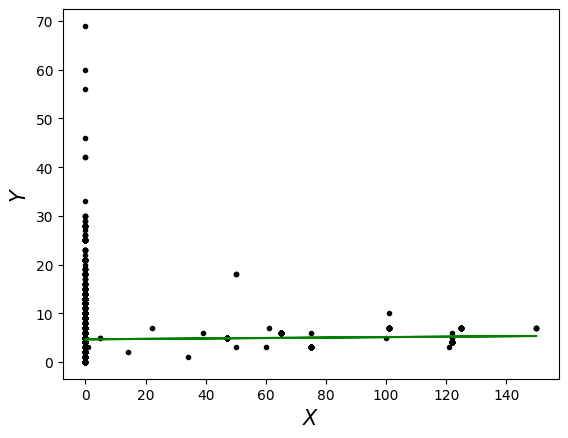

In [19]:
# Find the lines
y_1 = m_1 * X + c_1
plt.plot(X, Y, '.k');
plt.plot(X, y_1, "g");
plt.xlabel("$X$", fontsize=15)
plt.ylabel("$Y$", fontsize=15)
plt.show()

### Stochastic gradient descent:

Instead of going through all examples, Stochastic Gradient Descent (SGD) performs the parameters update on each example $(x_i,y_i)$. Therefore, learning happens on every example:
$$w = w - \alpha \triangledown_w J(x_i,y_i;w)$$

given the equation $y_i = mx_i + c$

we calculate the error as $E$ = $(y - y_i)^2$ ; where $y$ is the ground truth and $y_i$ is the prediction

Finding the rate of change in error with respect to m is $\frac{\partial E_i }{\partial m}$ = $ -2(y_i - (mx_i + c)) * x_i$

rate of change in c is $\frac{\partial E_i }{\partial c}$ = $ -2(y_i - (mx_i + c))$

And then we update the slope and bias with change in slope $\Delta m$ and change in bias $\Delta c$ with learning rate $eta$

$m$  = $m - \Delta m * eta$

$c$  = $c - \Delta c * eta$

The below function `next_step()` updates the values of m and c and calculates error. The loss is minimized due to the changed values of m and c. The new values m, c and the minimized loss are returned.

In [20]:
# change in m and c
def next_step(x, y, m, c, eta):
    ycalc = m * x + c                # linear regression expression
    error = (y - ycalc) ** 2         # error
    delta_m = -(y - ycalc) * x       # dy/dm
    delta_c = -(y - ycalc)           # dy/dc
    m = m - delta_m * eta            # gradient descent step to update m
    c = c - delta_c * eta            # gradient descent step to update c
    return m, c, error

The function below takes a random data point at a time and updates m and c using the function `next_step()`

In [21]:
# update m and c for one data point
def one_loop_random(x, y, m, c, eta):
    # Making random idx
    random_idx = np.arange(len(y))
    np.random.shuffle(random_idx)
    # Training with random idx
    for idx in random_idx:
        m, c, e = next_step(x[idx], y[idx], m, c, eta)
        #print(m, c, e)
    return m,c,e

The function below trains the data for 1000 iterations. In each iteration it calls the `one_loop_random()` function.

In [22]:
# train for 1000 iterations
def train_stochastic(x, y, m, c, eta, iterations=1000):
    for epoch in range(iterations):
        m, c, err = one_loop_random(x, y, m, c, eta)
    return m, c, err

In [23]:
# Initialize m, c
m, c = 0, 0
# Learning rate
lr = 0.0001

m = 0.0231124 c = 4.73145 Error = 0.535124
m = -0.0150803 c = 4.7098 Error = 0.503922
m = -0.0124635 c = 4.71865 Error = 5.20561
m = 0.000299614 c = 4.74281 Error = 14.0114
m = 0.000573879 c = 4.7332 Error = 7.47185
m = -0.00338136 c = 4.72735 Error = 10.7124
m = 0.000498588 c = 4.72909 Error = 5.15805
m = 0.022754 c = 4.71615 Error = 18.3551
m = -0.00354286 c = 4.73343 Error = 0.071072
m = 0.0229894 c = 4.73458 Error = 5.13313


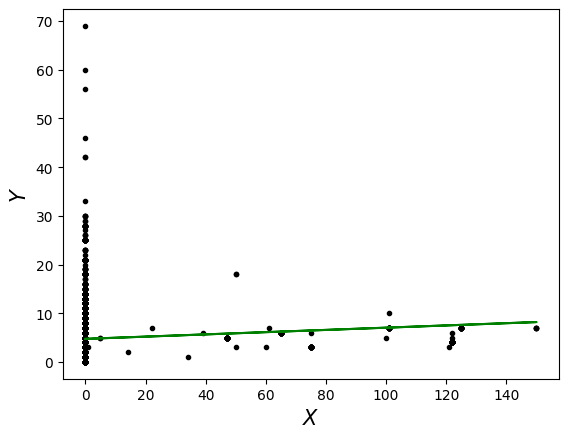

In [24]:
# Call the train_stochastic() method to update m and c and get error value with lr = 0.001.
for num in range(10):
    m, c, error = train_stochastic(X, Y, m, c, lr, iterations=100)
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))

y_calc = m * X + c

plt.plot(X, Y, '.k')
plt.plot(X, y_calc, "g")
plt.xlabel("$X$", fontsize=15)
plt.ylabel("$Y$", fontsize=15)
plt.show()

Plot Errors vs Iterations

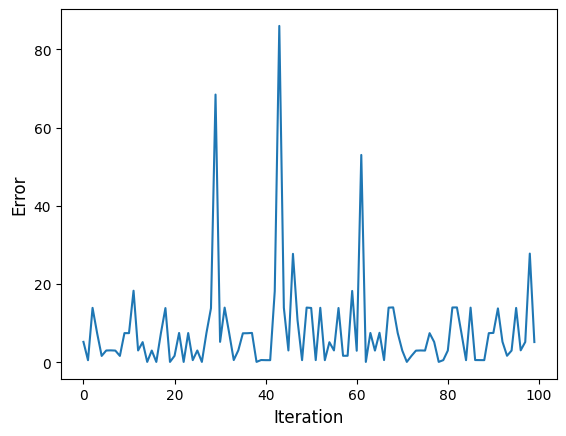

In [25]:
ms, cs, errs = [], [], []
m, c = 0, 0
lr = 0.0001

# Call the train_stochastic() method to update m and c and get error value with lr = 0.0001.
for times in range(100):
    m, c, error = train_stochastic(X, Y, m, c, lr, iterations=100) # We will plot the error values for every 100 iterations
    ms.append(m)
    cs.append(c)
    errs.append(error)

plt.plot(range(100), errs);
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.show()

### Minibatch Gradient Descent

In Mini-Batch Gradient Descent algorithm, rather than using  the complete data set, in every iteration we use a subset of training examples (called "batch") to compute the gradient of the cost function.

Common mini-batch sizes range between 50 and 256, but can vary for different applications.







Below is a graph that shows the gradient descent’s variants and their direction towards the minimum:
![img3](https://miro.medium.com/max/700/1*PV-fcUsNlD9EgTIc61h-Ig.png)

`train_one_batch()` : we will be calculating the essential parts of the Gradient Descent method:

We assume there are $n$ samples in a batch $B$, for all  $i \in B$,

$y_i = mx_i + c$
        
$E$ =$\frac{1}{n}$   $\sum_{i=1}^n (y - y_i)^2$

$\frac{\partial E }{\partial m}$ = $\frac{2}{n}$   $\sum_{i=1}^n  -x_i(y - (mx_i + c))$

$\frac{\partial E}{\partial c}$ = $\frac{2}{n}$   $\sum_{i=1}^n  -(y - (mx_i + c))$

`train_batches()` : We will be splitting our data into batches.

In [26]:
"""
The function 'train_one_batch()' updates the values of m and c and calculates error.
The loss is minimized due to the changed values of m and c.
The new values m, c and the minimized loss are returned.
"""
def train_one_batch(x, y, m, c, eta):
    const = - 2.0/len(y)
    ycalc = m * x + c                             # linear regression expression
    delta_m = const * sum(x * (y - ycalc))        # dy/dm
    delta_c = const * sum(y - ycalc)              # dy/dc
    m = m - delta_m * eta                         # gradient descent step to update m
    c = c - delta_c * eta                         # gradient descent step to update c
    error = sum((y - ycalc)**2)/len(y)            # error
    return m, c, error

"""
The function below takes a batch_size and loss is calculated w.r.t batches.
The batches are created using random index.
The m, c and error values are calculated for each batch of data.
So, it calls the function 'train_one_batch()' by passing batch_x, batch_y for each batch.
"""
def train_batches(x, y, m, c, eta, batch_size):
    # Making the batches
    random_idx = np.arange(len(y))
    np.random.shuffle(random_idx)

    # Train each batch
    for batch in range(len(y)//batch_size):
        batch_idx = random_idx[batch*batch_size:(batch + 1)*batch_size]
        batch_x = x[batch_idx]
        batch_y = y[batch_idx]
        m, c, err = train_one_batch(batch_x, batch_y, m, c, eta)

    return m, c, err

"""
The function below trains the data for 1000 iterations.
The data is traversed in batches, the batch size here is considered to be 10.
In each iteration it calls the 'train_batches' function.
The 'batch_size' is passed as a parameter to 'train_batches'.
"""
def train_minibatch(x, y, m, c, eta, batch_size=10, iterations=1000):
    for iteration in range(iterations):
        m, c, err = train_batches(x, y, m, c, eta, batch_size)
    return m, c, err

#### Train the Minibatch gradient descent

In [27]:
# Initializing m, c
m, c = 0, 0
# Learning rate
lr = 0.001

In [28]:
# Training for 1000 iterations, plotting after every 100 iterations:

# Call the train_minibatch() method to update m and c and get error value with lr = 0.001 and batch_size=90.
for num in range(10):
    # We will plot the error values for every 100 iterations
    m, c, error = train_minibatch(X, Y, m, c, lr, batch_size=90, iterations=100)
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))

y_calc = m * X + c

m = 0.00416682 c = 4.72774 Error = 10.5759
m = -0.00427505 c = 4.7295 Error = 12.0925
m = 0.0104007 c = 4.72602 Error = 8.65552
m = 0.000743341 c = 4.72686 Error = 8.67434
m = -0.000570639 c = 4.72628 Error = 7.57725
m = 0.00618048 c = 4.72677 Error = 7.13396
m = -0.00764331 c = 4.72788 Error = 10.3494
m = 0.0124867 c = 4.72776 Error = 7.90277
m = 0.0135853 c = 4.72507 Error = 6.59688
m = -0.00308416 c = 4.72737 Error = 9.61876


Visualization of line plot using minibatch gradient descent

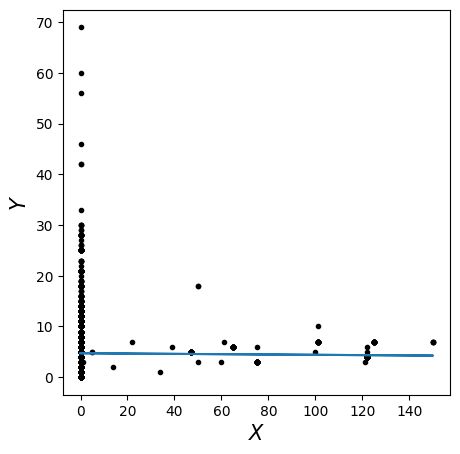

In [29]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.plot(X, Y, '.k')
ax.plot(X, y_calc)
plt.xlabel("$X$", fontsize=15)
plt.ylabel("$Y$", fontsize=15)
plt.show()

**Ungraded Exercise:** Experiment with other lr values.

**Ungraded Exercise:** Experiment with other batch_size values.

**Comparison of gradient descent variants**

![img](https://cdn.iisc.talentsprint.com/CDS/Images/Gradient_descent_variants_comparison.JPG)

To know more about gradient descent variants, click [here](https://hackernoon.com/demystifying-different-variants-of-gradient-descent-optimization-algorithm-19ae9ba2e9bc)

### Ungraded Question

**Question1 :** Determine the gradient of the function $x^2 - 2y^2 - 4y + 6$ at point (0, 0)?


**Solution:** ∇f = 0i − 4j

Explanation: At point (0,0), we calculate the gradient at this point as

∂f/∂x = 2x = 2(0) = 0

∂f/∂y = −4y − 4 = −4(0) − 4 = −4

which are used to determine the gradient as ∇f = 0i − 4j

# Does Gradient descent always successfully finds the global minima ?

# Answer
1. In theory, if the cost function is convex (only 1 minima: local-minima=global-minima), it is guaranteed to reach the global minimum, else the local minimum in case the loss function is not convex.
2. Gradient descent will not converge with high LR.